<a href="https://colab.research.google.com/github/uzeziogho/MLDM/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
!pip install apyori
!pip install xlrd
!pip install utils
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5973 sha256=3394f05979efe5f7c6bb2675a74f169ab20553d6c0d62ed6f4ea2179088eb796
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns
from wordcloud import WordCloud
import nltk
import pandas as pd
nltk.download(['stopwords','punkt','wordnet','omw-1.4','vader_lexicon'])
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [46]:
# test tokenizer
simple_text="This coursework is taking a whole load of time!"

In [47]:
tokenizer=nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+')
tokenized_document=tokenizer.tokenize(simple_text)
print(tokenized_document)

['This', 'coursework', 'is', 'taking', 'a', 'whole', 'load', 'of', 'time']


In [50]:
stop_words=nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [51]:
cleaned_tokens=[]

for word in tokenized_document:
  word=word.lower()
  if word not in stop_words:
    cleaned_tokens.append(word)

print(cleaned_tokens)

['coursework', 'taking', 'whole', 'load', 'time']


In [52]:
cleaned_words=[word.lower() for word in tokenized_document if word.lower() not in stop_words]
print(cleaned_tokens)

['coursework', 'taking', 'whole', 'load', 'time']


In [54]:
lemmatizer=nltk.stem.WordNetLemmatizer()
stemmer = nltk.stem.PorterStemmer()

words=['cacti','sings','hopped','rocks','better','easily']
pos=['n','v','v','n','a','r']

lemmatized_words=[lemmatizer.lemmatize(words[i],pos=pos[i])for i in range(6)]
stemmed_words=[stemmer.stem(word)for word in words]

print("Lemmatized words:",lemmatized_words)
print("Stemmed words:",stemmed_words)

Lemmatized words: ['cactus', 'sing', 'hop', 'rock', 'good', 'easily']
Stemmed words: ['cacti', 'sing', 'hop', 'rock', 'better', 'easili']


In [55]:
stemmed_text=[stemmer.stem(word) for word in cleaned_tokens]

print(stemmed_text)

['coursework', 'take', 'whole', 'load', 'time']


In [56]:
def preprocess_text(text):
  tokenized_document=nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)
  cleaned_tokens=[word.lower()for word in tokenized_document if word.lower()not in stop_words]
  stemmed_text=[nltk.stem.PorterStemmer().stem(word)for word in cleaned_tokens]
  return stemmed_text

In [7]:
tReviews=pd.read_csv('/content/tourist_accommodation_reviews.csv',encoding='cp1252')
tReviews.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment= SentimentIntensityAnalyzer()

print(sentiment.polarity_scores('This move is great!'))
print(sentiment.polarity_scores('This move is not great'))

{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588}
{'neg': 0.452, 'neu': 0.548, 'pos': 0.0, 'compound': -0.5096}


In [31]:
tReviews.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,53644,53644,53644,53644,53644
unique,49944,2344,25,537,49938
top,rn564592095,Reviewed 1 week ago,Patong,Da Mario,I have been to this restaurant several times f...
freq,10,616,16403,279,10


In [ ]:
review=tReviews.Review
review

In [11]:
tReviews['compound'] = tReviews['Review'].apply(lambda x:sentiment.polarity_scores(x)['compound'])
tReviews['neg'] = tReviews['Review'].apply(lambda x:sentiment.polarity_scores(x)['neg'])
tReviews['neu'] = tReviews['Review'].apply(lambda x:sentiment.polarity_scores(x)['neu'])
tReviews['pos'] = tReviews['Review'].apply(lambda x:sentiment.polarity_scores(x)['pos'])

In [12]:
#tReviews['compound']=[sentiment.polarity_scores(review)['compound']for review in tReviews['tReviews.text']]
#tReviews['neg']=[sentiment.polarity_scores(review)['neg']for review in tReviews['tReviews.text']]
#tReviews['neu']=[sentiment.polarity_scores(review)['neu']for review in tReviews['tReviews.text']]
#tReviews['pos']=[sentiment.polarity_scores(review)['pos']for review in tReviews['tReviews.text']]

In [13]:
tReviews[['compound','neg','neu','pos']].describe()

,compound,neg,neu,pos
count,53644.000000,53644.000000,53644.000000,53644.000000
mean,0.659430,0.026920,0.737564,0.235519
std,0.423819,0.051134,0.127370,0.136031
min,-0.975700,0.000000,0.217000,0.000000
25%,0.585900,0.000000,0.654000,0.133000
50%,0.844200,0.000000,0.744000,0.228000
75%,0.927100,0.042000,0.830000,0.327000
max,0.993200,0.635000,1.000000,0.783000


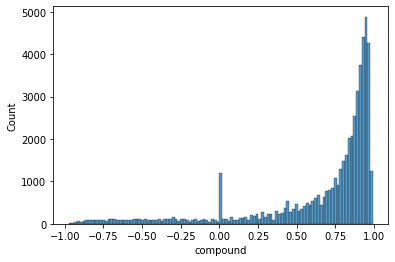

In [14]:
sns.histplot(tReviews['compound'])

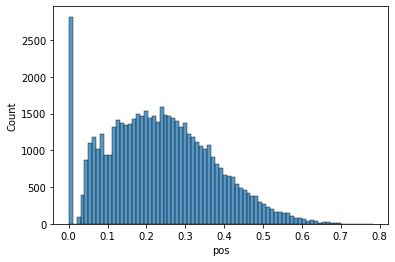

In [15]:
sns.histplot(tReviews['pos'])

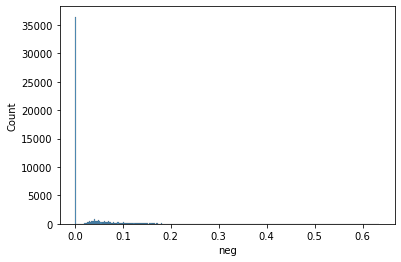

In [16]:
sns.histplot(tReviews['neg'])

In [38]:
#Lets look at how many negative reviews we have per product
iReviews=(tReviews['compound']<=0).groupby(tReviews['Location']).sum().sort_values(ascending=False).head(10)
iReviews

Location
 Patong              1920
 Kata Beach           668
 Karon                649
 Phuket Town          411
 Rawai                399
 Kamala               344
 Choeng Thale         273
 Mai Khao             211
 Thalang District     170
 Kathu                158
Name: compound, dtype: int64

In [37]:
#Lets look at how many negative reviews we have per product
iReviews=(tReviews['compound']<=0).groupby(tReviews['Hotel/Restaurant name']).sum().sort_values(ascending=False).head(10)
iReviews
#df[s.sort_values(ascending=False).index[:2]]

Hotel/Restaurant name
Da Mario                         49
Outdoor Restaurant               48
The Pizza Company                45
La Casa                          44
Dada Yura Restaurant             40
Pizza Hut - Jungceylon           39
Ali Baba Restaurant              37
Mama Restaurant - Karon Beach    37
Restaurant La Croisette          36
Khan Baba phuket                 34
Name: compound, dtype: int64

In [29]:
# extracting greatest 20
#Calculate as percentage of total reviews

percent_negative20=pd.DataFrame((tReviews['compound']<=0).groupby(tReviews['Hotel/Restaurant name']).sum()
                              /tReviews['Hotel/Restaurant name'].groupby(tReviews['Hotel/Restaurant name']).count()*100,
                              columns=['%negative reviews']).nlargest(20,'%negative reviews')
percent_negative20

,%negative reviews
Hotel/Restaurant name,
Dada Yura Restaurant,50.000000
La Casa,45.833333
Pizza Hut - Jungceylon,39.393939
Restaurant La Croisette,38.297872
Ali Baba Restaurant,37.000000
Mama Restaurant - Karon Beach,37.000000
Khan Baba phuket,35.051546
Food Market Restaurant,34.343434
Chez Nicolas,33.333333


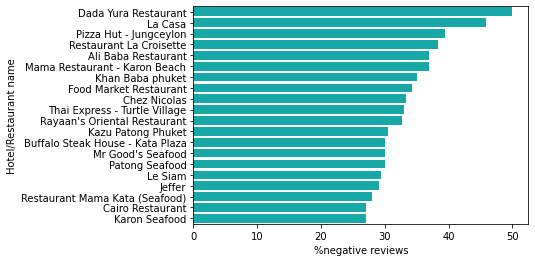

In [33]:
sns.barplot(data=percent_negative20,x='%negative reviews',y=percent_negative20.index,color='c')

In [34]:
#Calculate as percentage of total reviews
percent_negative=pd.DataFrame((tReviews['compound']<=0).groupby(tReviews['Location']).sum()
                              /tReviews['Location'].groupby(tReviews['Location']).count()*100,columns=['%negative reviews']).sort_values(by='%negative reviews')
percent_negative

,%negative reviews
Location,
Talat Nuea,2.061856
Sakhu,3.296703
Pa Khlok,5.000000
Wichit,6.075949
Koh Kaew,6.825939
Bang Tao Beach,7.833333
Kata Noi Beach,8.000000
Choeng Thale,8.081705
Mai Khao,8.895447


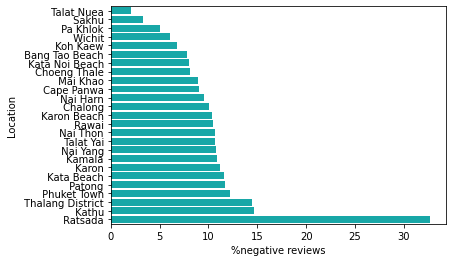

In [40]:
sns.barplot(data=percent_negative,x='%negative reviews',y=percent_negative.index,color='c')

In [60]:
# Process the text data ready for wordcloud visualisation,using the function we defined earlier
# For this part of the exercise we will focus specially on RATSAD

tReviews['processed_review']=tReviews['Review'].apply(preprocess_text)
tReviews_positive_subset=tReviews.loc[(tReviews['Hotel/Restaurant name']=='Dada Yura Restaurant')&(tReviews['compound']>0),:]
tReviews_negative_subset=tReviews.loc[(tReviews['Hotel/Restaurant name']=='Dada Yura Restaurant')&(tReviews['compound']<=0),:]

tReviews_negative_subset.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos,processed_review
52481,rn470303330,"Reviewed March 26, 2017",Kata Beach,Dada Yura Restaurant,One of the most terrific experience in my life...,-0.2516,0.115,0.812,0.073,"[one, terrif, experi, life, travel, lot, servi..."
52482,rn468001722,"Reviewed March 17, 2017",Kata Beach,Dada Yura Restaurant,"Service was non existant, staff untidy and mes...",-0.5673,0.228,0.684,0.089,"[servic, non, exist, staff, untidi, messi, foo..."
52483,rn466399193,"Reviewed March 11, 2017",Kata Beach,Dada Yura Restaurant,"Service was terrible , food was very basic and...",-0.7634,0.210,0.735,0.055,"[servic, terribl, food, basic, tradit, pelmern..."
52487,rn364836775,"Reviewed April 17, 2016",Kata Beach,Dada Yura Restaurant,Really bad quality of food taste is very bad. ...,-0.6789,0.188,0.687,0.125,"[realli, bad, qualiti, food, tast, bad, stake,..."
52489,rn470303330,"Reviewed March 26, 2017",Kata Beach,Dada Yura Restaurant,One of the most terrific experience in my life...,-0.2516,0.115,0.812,0.073,"[one, terrif, experi, life, travel, lot, servi..."


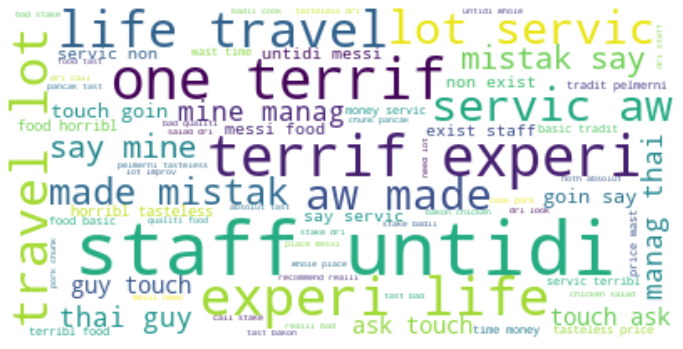

In [72]:
neg_tokens=[word for tReviews in tReviews_negative_subset['processed_review'] for word in tReviews]

wordcloud = WordCloud(background_color='white').generate_from_text(
    ' '.join(neg_tokens))

#Display the generated image
plt.figure(figsize=(12,12))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

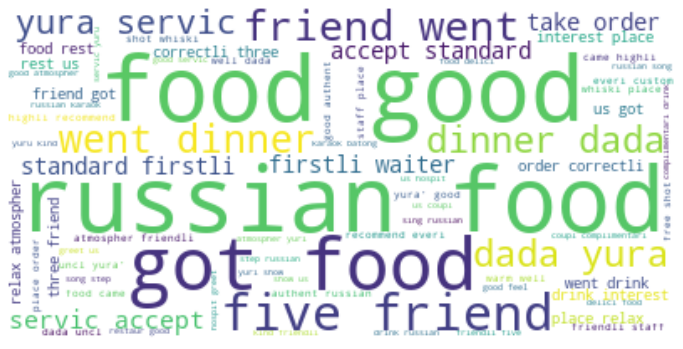

In [71]:
pos_tokens=[word for tReviews in tReviews_positive_subset['processed_review'] for word in tReviews]

wordcloud = WordCloud(background_color='white').generate_from_text(
    ' '.join(pos_tokens))

#Display the generated image
plt.figure(figsize=(12,12))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [73]:
from wordcloud.wordcloud import process_tokens
#use the nltk FreqDist and then tabulate
from nltk.probability import FreqDist

neg_freqDist=FreqDist(neg_tokens)

neg_freqDist.tabulate(10)

servic   food    dri   tast    lot    say  touch  staff untidi  messi 
    30     30     30     30     20     20     20     20     20     20 


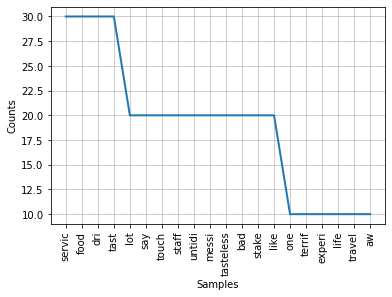

In [74]:
neg_freqDist.plot(20)

In [66]:
from wordcloud.wordcloud import process_tokens
#use the nltk FreqDist and then tabulate
from nltk.probability import FreqDist

pos_freqDist=FreqDist(pos_tokens)

pos_freqDist.tabulate(10)

   food russian    good      us   place  friend    went  servic   order     got 
     70      50      50      30      30      20      20      20      20      20 


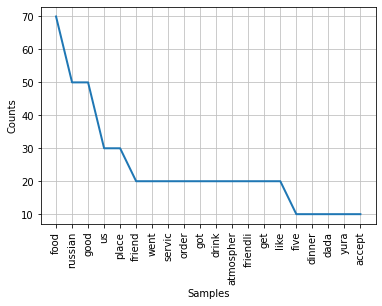

In [67]:
pos_freqDist.plot(20)